In [ ]:
from google.colab import files
files.upload()

Saving validation Data.csv to validation Data.csv


{'validation Data.csv': b',Unnamed: 0,Unnamed: 0.1,id,text,vectorized,label\r\n0,0,11,1240862172907012102,  i    kinda    enjoy    corona  ,[0. 0. 0. ... 0. 0. 0.],1\r\n1,1,118,1240862208063606784,     i    hope    safe    corona    virus        my    rat    anna    wants    library    can  t    corona    virus    canada  ,[0. 0. 0. ... 0. 0. 0.],2\r\n2,2,227,1240862215260889089,  countrimen     get    panic     corona    virus    certainly    come    come    down     only    precaution    needed   ,[0. 0. 0. ... 0. 0. 0.],1\r\n3,3,251,1240862232499466241,  leave    us    beautiful    ladies    alone  ,[0. 0. 0. ... 0. 0. 0.],1\r\n4,4,325,1240862255719149568,  that    even    solve    difficult    problem    maths    science    even    college    level     when    corona    arises     i    jokely    asked    medicines    corona     he    writes    down     same    thing    written    every    asking     so    i    doubt    whether    writing    might    hopeful  ,[0. 0. 0. ... 0. 0. 0.

In [ ]:
import torch
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
!pip install transformers

     |████████████████████████████████| 1.9MB 18.5MB/s 
     |████████████████████████████████| 890kB 49.7MB/s 
     |████████████████████████████████| 3.2MB 48.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=3712e478a356450568639cc9b8382967d7abec403c6154f06780d6a72dac506d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import pandas as pd
import torch
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
import pickle
from keras.preprocessing.sequence import pad_sequences

torch.cuda.empty_cache()
mydata=pd.read_csv('merged_data.csv',skiprows=[0,1,2])
my_test_data = pd.read_csv('FINAL_DAY.csv')
val_data = pd.read_csv('validation Data.csv')
mydataframe=pd.DataFrame(mydata)
mytestdataframe = pd.DataFrame(my_test_data)
del mydataframe['Unnamed: 0']
del mydataframe['Unnamed: 0.1']
del mydataframe['Unnamed: 0.1.1']
del mytestdataframe['Unnamed: 0']
del mytestdataframe['Unnamed: 0.1']
del mytestdataframe['id']
train_data = mydataframe['text']
train_data_y=mydataframe['label']
train_data_set=pd.DataFrame(train_data)
train_data_set['label']=list(train_data_y)
test_data_set = pd.DataFrame(val_data)
test_data = test_data_set['text']
test_data_y=test_data_set['label']

In [ ]:
from transformers import BertTokenizerFast
mytokenizer=BertTokenizerFast.from_pretrained('bert-base-uncased',do_lower=True)
def bert_data_preprocessing(values):
  input_ID = []
  attention_mask = []

  for data in values:
    encode_sent_data = mytokenizer.encode_plus(text=data ,truncation=True, add_special_tokens=True, max_length=MAX_LEN,pad_to_max_length=True,return_attention_mask=True)
    input_ID.append(encode_sent_data.get('input_ids'))
    attention_mask.append(encode_sent_data.get('attention_mask'))

    
  attention_mask = torch.tensor(attention_mask)  
  input_ID = torch.tensor(input_ID)
  return input_ID, attention_mask


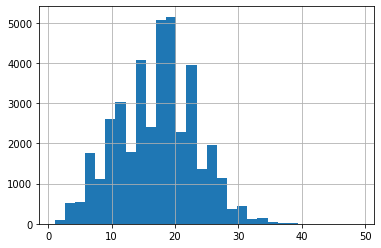

In [ ]:
seq_len = [len(i.split()) for i in train_data]
pd.Series(seq_len).hist(bins=30)

In [ ]:
all_twitter_data = np.concatenate([train_data_set.text.values,test_data_set.text.values])
test_twitter_data = np.concatenate([mytestdataframe.text.values])
my_encoded_tweets= [mytokenizer.encode(tweet,add_special_tokens=True) for tweet in all_twitter_data]
test_encoded_tweets = [mytokenizer.encode(tweet,add_special_tokens=True) for tweet in test_twitter_data]

In [ ]:
MAX_LEN=40

token_ids = list(bert_data_preprocessing([mydataframe.text.values[0]])[0].squeeze().numpy())
print(X[0])
print(token_ids)

print("WE ARE TOKENIZING OUR DATA NOW")

train_input_id, train_attention_mask = bert_data_preprocessing(train_data)
test_input_id , test_attention_mask = bert_data_preprocessing(test_data)

testing_input_id,testing_attention_mask = bert_data_preprocessing(mytestdataframe['text'])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


shut rumor shutting everything happening utah experiencing temporary reason hopeful optimistic utpol
[101, 3844, 19075, 17521, 2673, 6230, 6646, 13417, 5741, 3114, 17772, 21931, 21183, 18155, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
WE ARE TOKENIZING OUR DATA NOW


In [ ]:
# Data Loader
from torch.utils.data import TensorDataset ,  DataLoader, RandomSampler, SequentialSampler
training_labels = torch.tensor(list(train_data_y))
testing_labels = torch.tensor(list(test_data_y))
test_labels = torch.tensor(list(mytestdataframe['label']))

batch_size=430
print(train_input_id.shape)
print(train_attention_mask.shape)
print(training_labels.shape)
tensors_train = [train_input_id, train_attention_mask]
training_data = TensorDataset(train_input_id, train_attention_mask,training_labels)
training_sampler = RandomSampler(training_data)
training_dataloader = DataLoader(training_data , sampler = training_sampler, batch_size=batch_size)

testing_data=TensorDataset(test_input_id, test_attention_mask,testing_labels)
testing_sampler = SequentialSampler(testing_data)
testing_dataloader = DataLoader(testing_data , sampler = testing_sampler, batch_size=batch_size)

test_data =  TensorDataset(testing_input_id, testing_attention_mask,test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data , sampler = test_sampler, batch_size=batch_size)



torch.Size([39984, 40])
torch.Size([39984, 40])
torch.Size([39984])


In [ ]:
# classifier
import torch
import torch.nn as tor_nn
from transformers import BertModel

class ClassifierBert(tor_nn.Module):
  def __init__(self, freeze_bert=False):

    super (ClassifierBert,self).__init__()

    bert_hidden, classifier_hidden , output_labels = 768 , 64 , 3
    self.bert=BertModel.from_pretrained('bert-base-uncased')
    if freeze_bert:

      for parameter in self.bert.parameters():

        parameter.requires_grad=False

    self.dropout = tor_nn.Dropout(0.6)
    self.relu = tor_nn.ReLU()
    self.fc1 =  tor_nn.Linear(768,25)
    self.fc4 = tor_nn.Linear(25,3)
    self.softmax = tor_nn.LogSoftmax(dim=1)
    self.lstm = tor_nn.LSTM(768,256,bidirectional=True,batch_first=True)
    self.linear = tor_nn.Linear(512,3)

    

  def forward(self, input_ids, attention_mask):

    _,output = self.bert(input_ids=input_ids,attention_mask=attention_mask,return_dict=False)

    logits = self.fc1(output)

    logits=self.relu(logits)

    logits = self.dropout(logits)

    logits = self.fc4(logits)

    logits = self.softmax(logits)

   

   

    return logits
                      

In [ ]:
# optimizers and learning rate scheduler 

from transformers import AdamW, get_linear_schedule_with_warmup



def model_initialization(epochs=10):
  
  classifier_bert = ClassifierBert(freeze_bert = False)

  # classifier_bert = bert_model_

  classifier_bert=classifier_bert.to(device)

  optimizer = AdamW(classifier_bert.parameters(),
                    lr= 5e-6,
                    eps = 1e-8
                    )
  steps = len(training_dataloader) * epochs

  scheduler_bert = get_linear_schedule_with_warmup(optimizer , num_warmup_steps=0,
                   num_training_steps=steps
                  )
  
  return classifier_bert,optimizer,scheduler_bert

  


In [ ]:
import random
import time
from torch.nn import functional as F 
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced',np.unique(train_data_y),train_data_y)
weights_ = torch.tensor(class_weights,dtype = torch.float).to(device)
loss_function = tor_nn.CrossEntropyLoss(weight=weights_)


def set_seed(seed_val=42):

  random.seed(seed_val)

  np.random.seed(seed_val)

  torch.manual_seed(seed_val)

  torch.cuda.manual_seed_all(seed_val)

def model_training(model , training_dataloader , testing_dataloader=None , epochs=10 , evaluation=False):


  print('We are starting to train the model....\n')

  for epoch_i in range(epochs):

    print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Elapsed':^9}")
    
    print('-'*60) 

    t_epoch , t_batch = time.time() , time.time()

    loss_total , loss_batch , count_batch =0,0,0

    model.train()

    for step,batch in enumerate(training_dataloader):

      count_batch+=1

      bert_input_ids , bert_attention_mask , bert_label = tuple(t.to(device) for t in batch)
      
      model.zero_grad()
      
      logits=model(bert_input_ids, bert_attention_mask)

      

      loss = loss_function(logits,bert_label)

      loss_batch+=loss.item()

      loss_total += loss.item()

      loss.backward()

      torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)

      optimizer.step()

      scheduler_bert.step()
 
      if (step%20 == 0 and step!=0) or (step==len(training_dataloader)-1):

        time_elapsed = time.time() - t_batch

        print(f"{epoch_i + 1:^7} | {step:^7} | {loss_batch / count_batch:^12.6f} | {'-':^10} |  {time_elapsed:^9.2f}") 

        loss_batch , count_batch = 0,0

        t_batch = time.time()

        print('-'*70)

      average_training_loss = loss_total/len(training_dataloader)

      



      if evaluation == True:
        if (step==len(training_dataloader)-1):
          loss_training,loss_accuracy = model_evaluating(model,testing_dataloader)

          time_elapsed = time.time() - t_epoch

          print(f"{epoch_i + 1:^7} | {'-':^7} | {average_training_loss:^12.6f} | {loss_training:^10.6f} |  {time_elapsed:^9.2f}")

          print("-"*70)

    print("\n")
    
    print("Training complete!")


def model_evaluating(model,testing_dataloader):
  
  model.eval()

  loss_accuracy = []

  loss_training = []

  for batch in testing_dataloader:

    bert_input_ids , bert_attention_mask, bert_label = tuple(t.to(device) for t in batch)
    
    
    with torch.no_grad():

      logits = model(bert_input_ids,bert_attention_mask)
      

    loss = loss_function(logits,bert_label)
    
    loss_training.append(loss.item())

    prediction = torch.argmax(logits , dim=1).flatten()

    accuracy = (prediction==bert_label).cpu().numpy().argmax().mean()*100

    loss_accuracy.append(accuracy)

  loss_training = np.mean(loss_training)

  loss_accuracy = np.mean(loss_accuracy)

  return loss_training , loss_accuracy

set_seed(42)
classifier_bert, optimizer, scheduler_bert = model_initialization(epochs=100)
  
model_training(classifier_bert, training_dataloader, testing_dataloader,epochs=100,evaluation=True)


 


We are starting to train the model....

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Elapsed 
------------------------------------------------------------
   1    |   20    |   1.106404   |     -      |    50.99  
----------------------------------------------------------------------
   1    |   40    |   1.092249   |     -      |    52.65  
----------------------------------------------------------------------
   1    |   60    |   1.077891   |     -      |    54.66  
----------------------------------------------------------------------
   1    |   80    |   1.044070   |     -      |    54.39  
----------------------------------------------------------------------
   1    |   92    |   1.024169   |     -      |    32.61  
----------------------------------------------------------------------
   1    |    -    |   1.073212   |  0.993081  |   261.29  
----------------------------------------------------------------------


Training complete!
 Epoch  |  Batch  |  Train Loss  |  Val

In [ ]:
classifier_bert.eval()

ClassifierBert(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tru

In [ ]:
def evaluate(model,testing_dataloader):
  model.eval()

  loss_validation=0

  predictions,true_value = [],[]

  for batch in testing_dataloader:
    bert_input_ids , bert_attention_mask, bert_label = tuple(t.to(device) for t in batch)
    with torch.no_grad():

       logits = model(bert_input_ids,bert_attention_mask)
       #logits =output.logits
    # 
    loss=loss_function(logits , bert_label)
    loss_validation+=loss.item()

    logits = logits.detach().cpu().numpy()
    label_ids = bert_label.cpu().numpy()
    predictions.append(logits)
    true_value.append(label_ids)
  average_validation_loss = loss_validation/len(testing_dataloader)
  predictions = np.concatenate(predictions ,axis=0)
  true_value = np.concatenate(true_value,axis=0)
  return predictions,true_value


In [ ]:
from sklearn.metrics import f1_score, classification_report,accuracy_score,log_loss,precision_score,recall_score
possible_labels = mydataframe.label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict
def f1_score_evaluation(pred,labels):
  pred_flat = np.argmax(pred,axis=1).flatten()
  label_flat = labels.flatten()
  print(f1_score(label_flat , pred_flat , average = 'weighted'))
  print(accuracy_score(label_flat , pred_flat))

def accuracy_score_evaluation(pred,labels):
  pred_flat = np.argmax(pred,axis=1).flatten()
  label_flat = labels.flatten()
  return accuracy_score(label_flat , pred_flat)

def classification_report_evaluation(pred,labels):
  pred_flat = np.argmax(pred,axis=1).flatten()
  label_flat = labels.flatten()
  print(classification_report(label_flat , pred_flat))

def accuracy_of_classes(pred,labels):
  label_dict_inverse = {v:k for k,v in label_dict.items()}

def overall_evaluation(pred,labels):
  pred_flat = np.argmax(pred,axis=1).flatten()
  label_flat = labels.flatten()
  print(f'"ACCURACY:"{accuracy_score(label_flat , pred_flat)}')
  print(f'F1 SCORE: {f1_score(label_flat , pred_flat, average="weighted")}')
  print(f'PRECISION:{precision_score(label_flat , pred_flat, average="weighted")}')
  print(f'RECALL:{recall_score(label_flat , pred_flat, average="weighted")}')
  print(classification_report(label_flat , pred_flat,digits=6))
  bert_metrics=classification_report(label_flat , pred_flat,digits=6,output_dict=True)
  bert_metrics_dataframe = pd.DataFrame(bert_metrics).transpose()
  print(bert_metrics)


predictions1,true_value1 = evaluate(classifier_bert,testing_dataloader)
overall_evaluation(predictions1,true_value1)


"ACCURACY:"0.9671654197838736
F1 SCORE: 0.9671233514338428
PRECISION:0.9673725271541872
RECALL:0.9671654197838736
              precision    recall  f1-score   support

           0   0.970252  0.940133  0.954955       451
           1   0.975741  0.964476  0.970076      1126
           2   0.954439  0.985525  0.969733       829

    accuracy                       0.967165      2406
   macro avg   0.966811  0.963378  0.964921      2406
weighted avg   0.967373  0.967165  0.967123      2406

{'0': {'precision': 0.9702517162471396, 'recall': 0.9401330376940134, 'f1-score': 0.954954954954955, 'support': 451}, '1': {'precision': 0.9757412398921833, 'recall': 0.9644760213143873, 'f1-score': 0.9700759267530148, 'support': 1126}, '2': {'precision': 0.9544392523364486, 'recall': 0.985524728588661, 'f1-score': 0.9697329376854599, 'support': 829}, 'accuracy': 0.9671654197838736, 'macro avg': {'precision': 0.9668107361585904, 'recall': 0.9633779291990207, 'f1-score': 0.9649212731311433, 'support':